In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [116]:
df = pd.read_csv('hypertension_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [117]:
df1 = df.copy(deep=True)
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [118]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [119]:
df1.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [120]:
df1.dropna(axis=0,inplace=True)

In [121]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26058.000000,26058.00000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000
mean,55.655730,0.50000,0.956635,131.590682,246.286591,0.149896,0.526057,149.643181,0.326886,1.039742,1.399724,0.720623,2.319057,0.547778
std,15.190407,0.50001,1.022467,17.597086,51.651701,0.356977,0.525688,22.865871,0.469084,1.165673,0.616529,1.011317,0.604868,0.497722
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot: ylabel='target'>

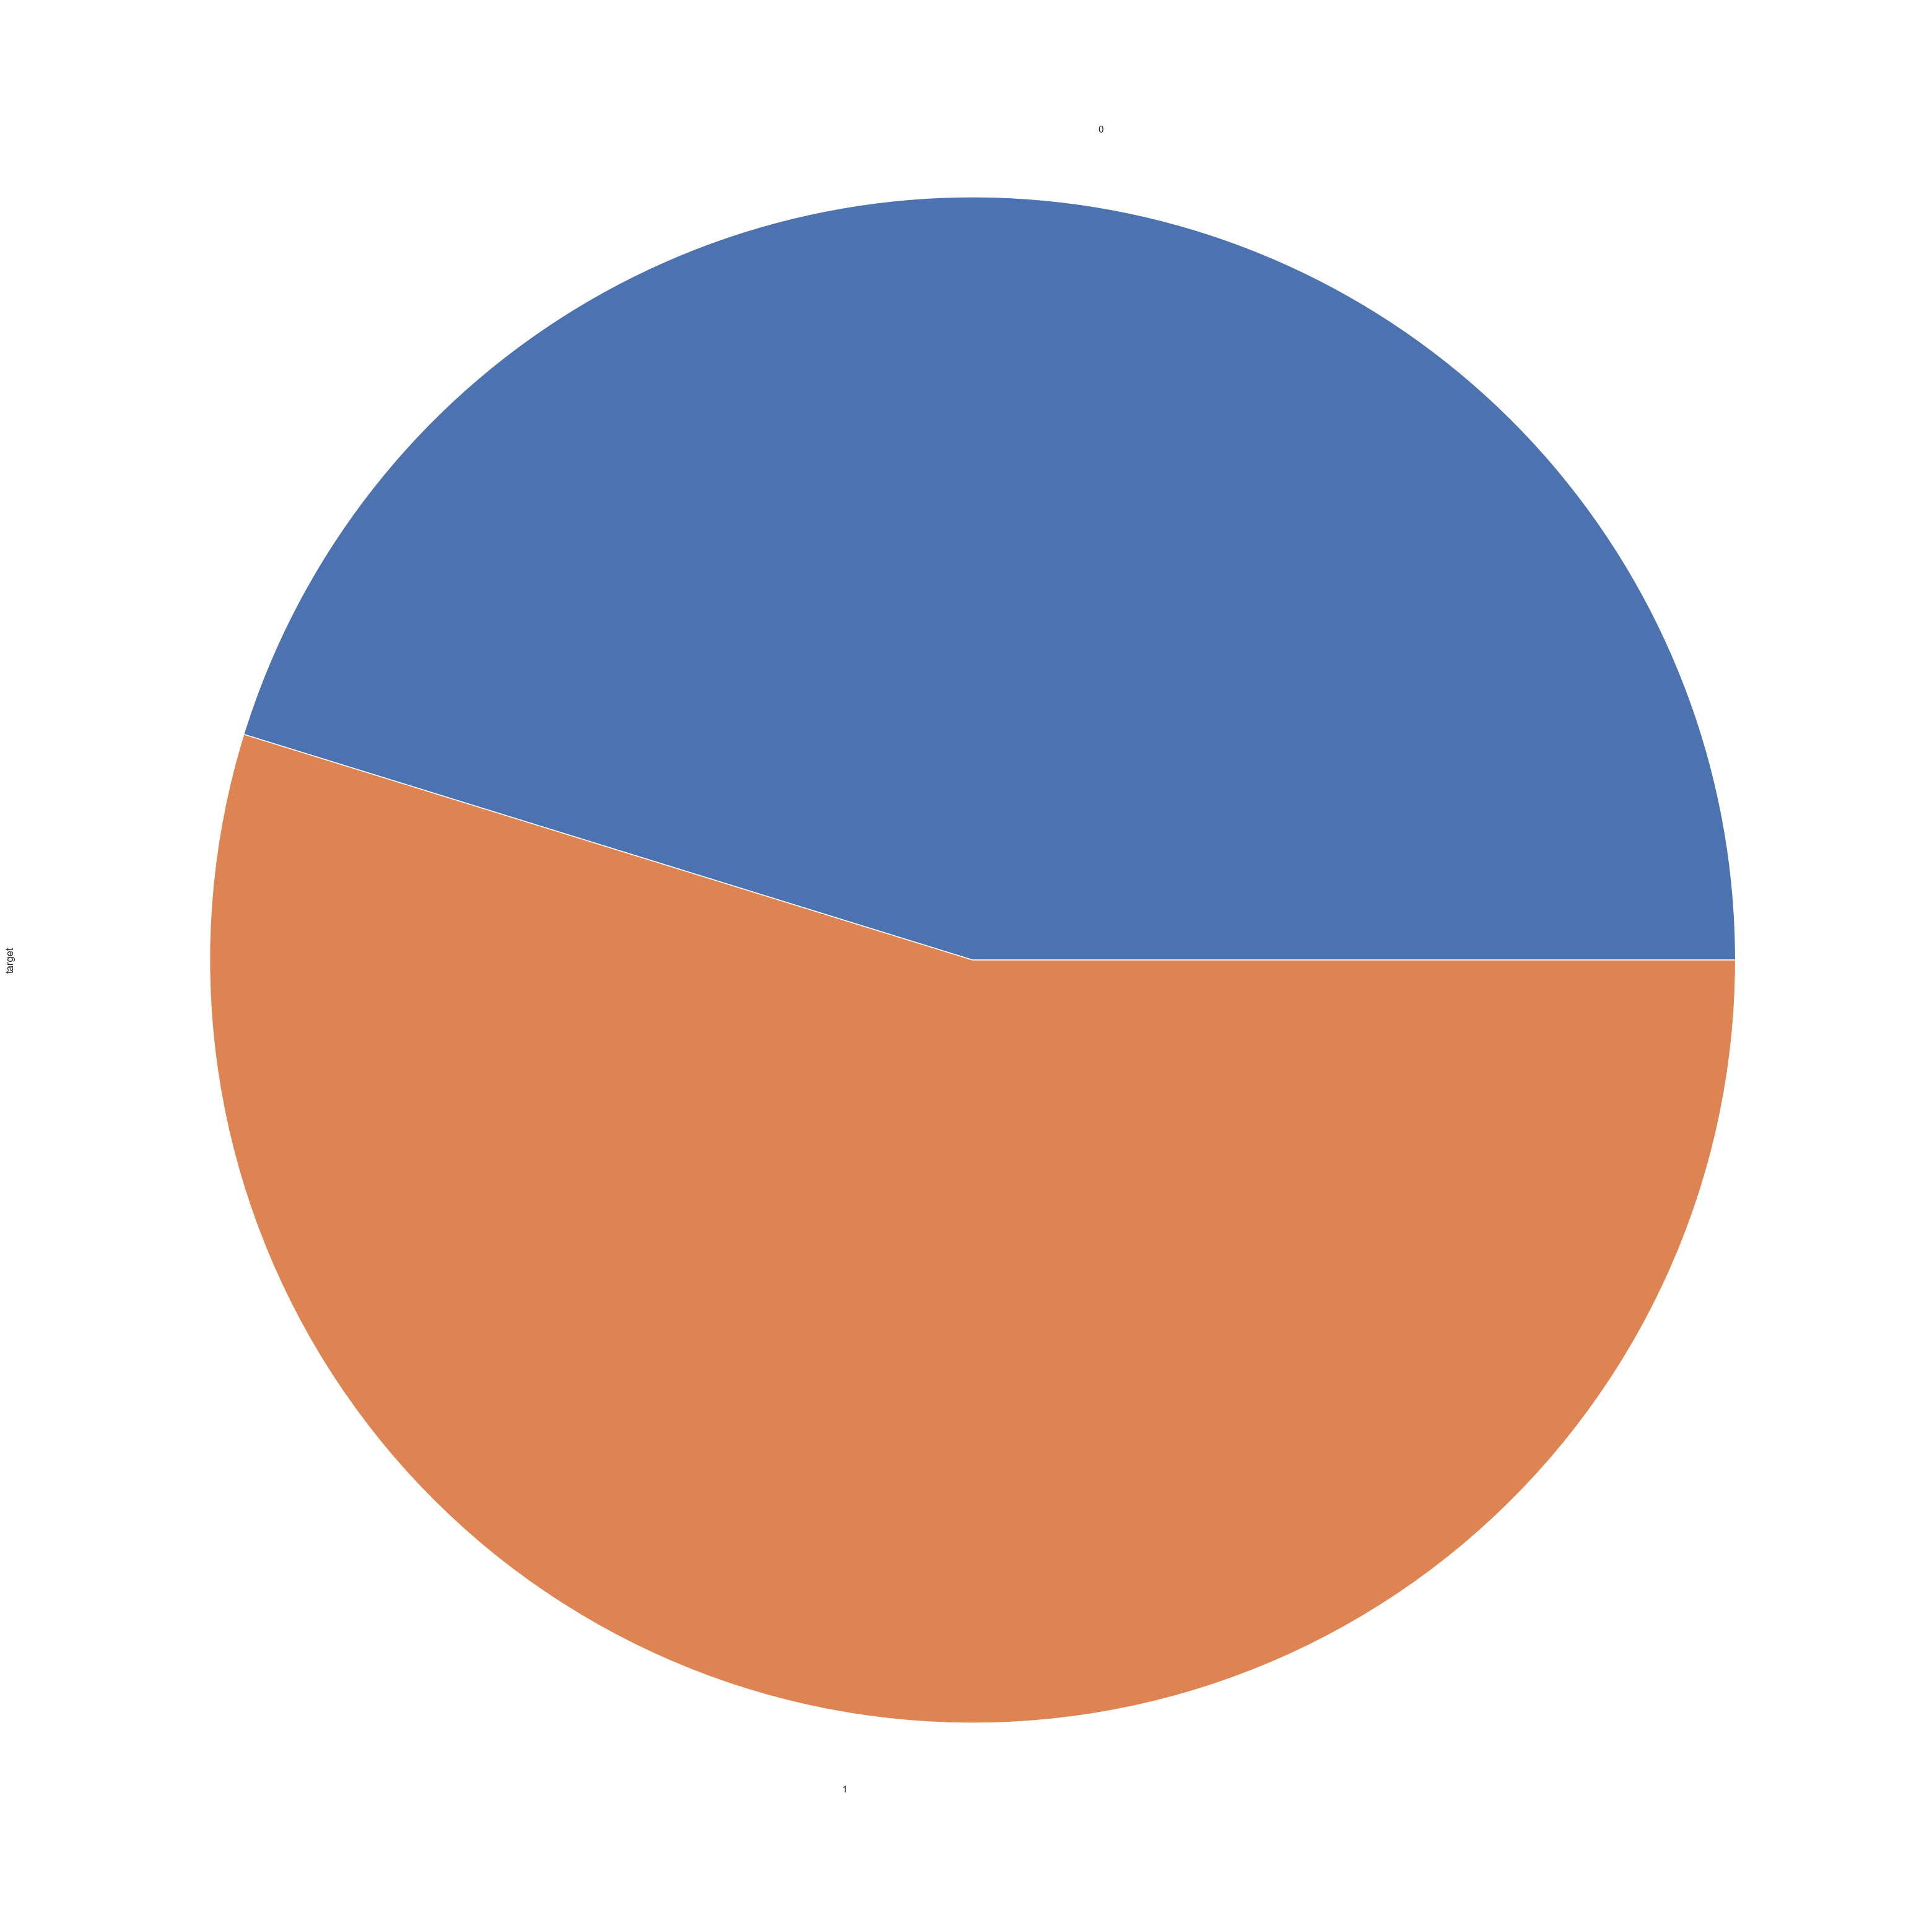

In [122]:
df1.groupby('target')['target'].count().plot(kind='pie')

small 1 biasness which is okay

In [123]:
df1.target.value_counts()

1    14274
0    11784
Name: target, dtype: int64

In [124]:
df1.shape

(26058, 14)

In [125]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 0 categorical variables



In [126]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 14 numerical variables

The numerical variables : ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


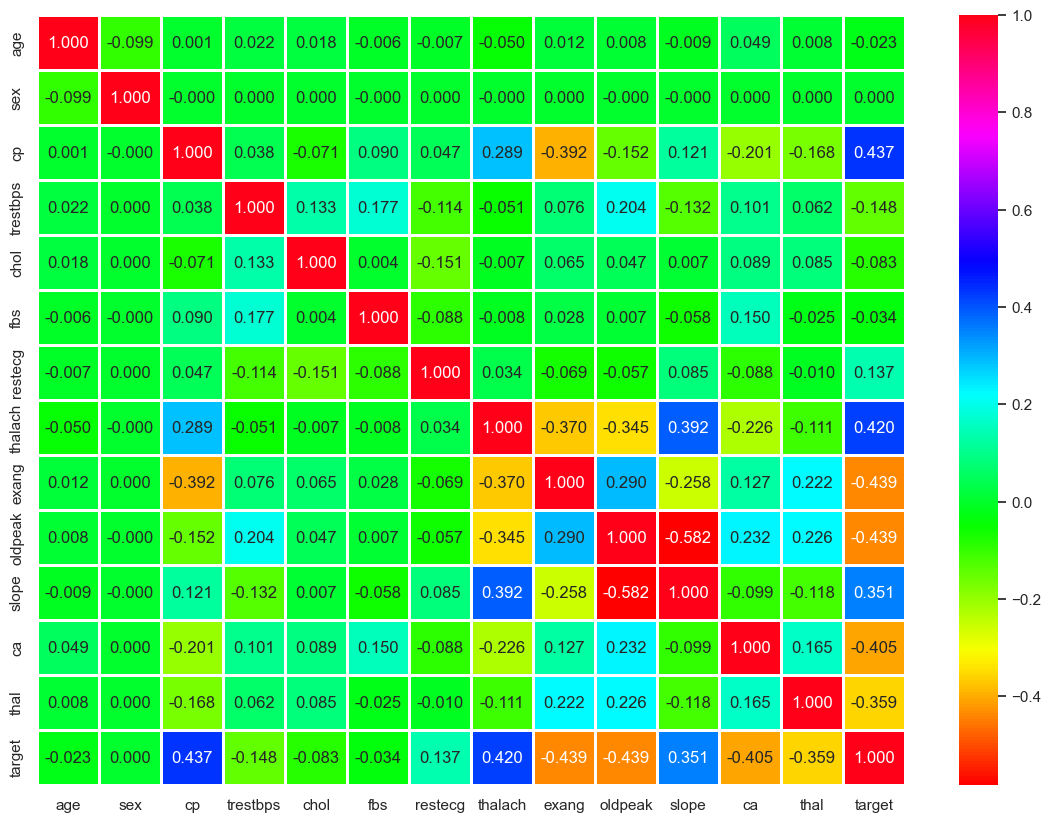

In [127]:
plt.figure(figsize=(14,10))
sns.heatmap(df1[numerical].corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [128]:
# sns.set_theme(style="ticks")
# sns.pairplot(df1, hue="target")

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'trestbps'}>],
       [<AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'fbs'}>,
        <AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalach'}>],
       [<AxesSubplot: title={'center': 'exang'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'ca'}>],
       [<AxesSubplot: title={'center': 'thal'}>,
        <AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

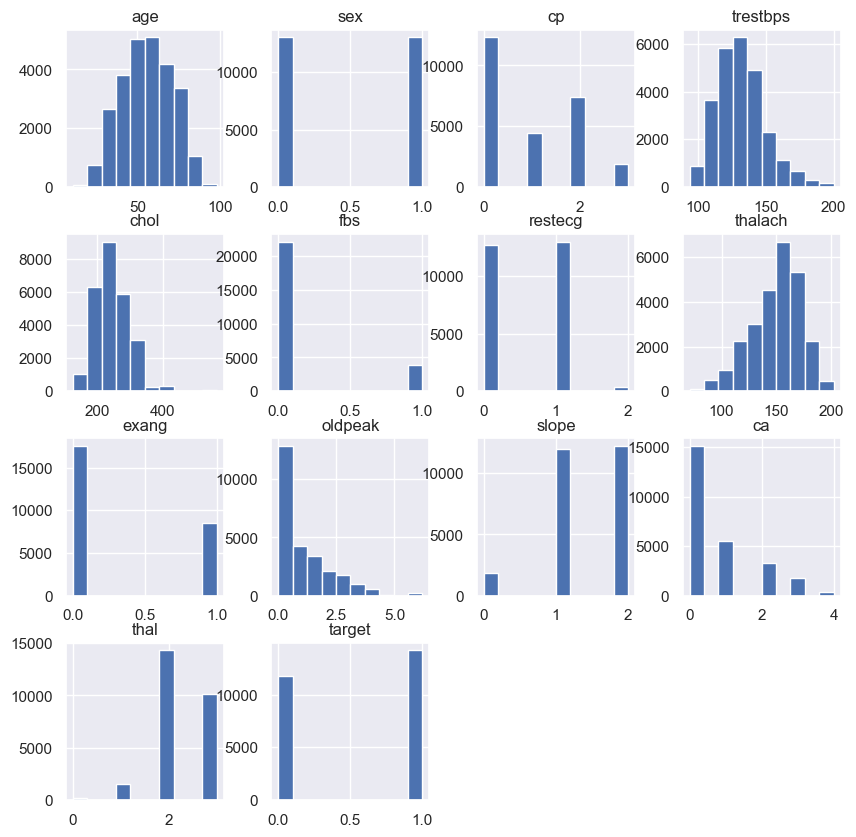

In [129]:
df1.hist(figsize=(10,10))

<AxesSubplot: >

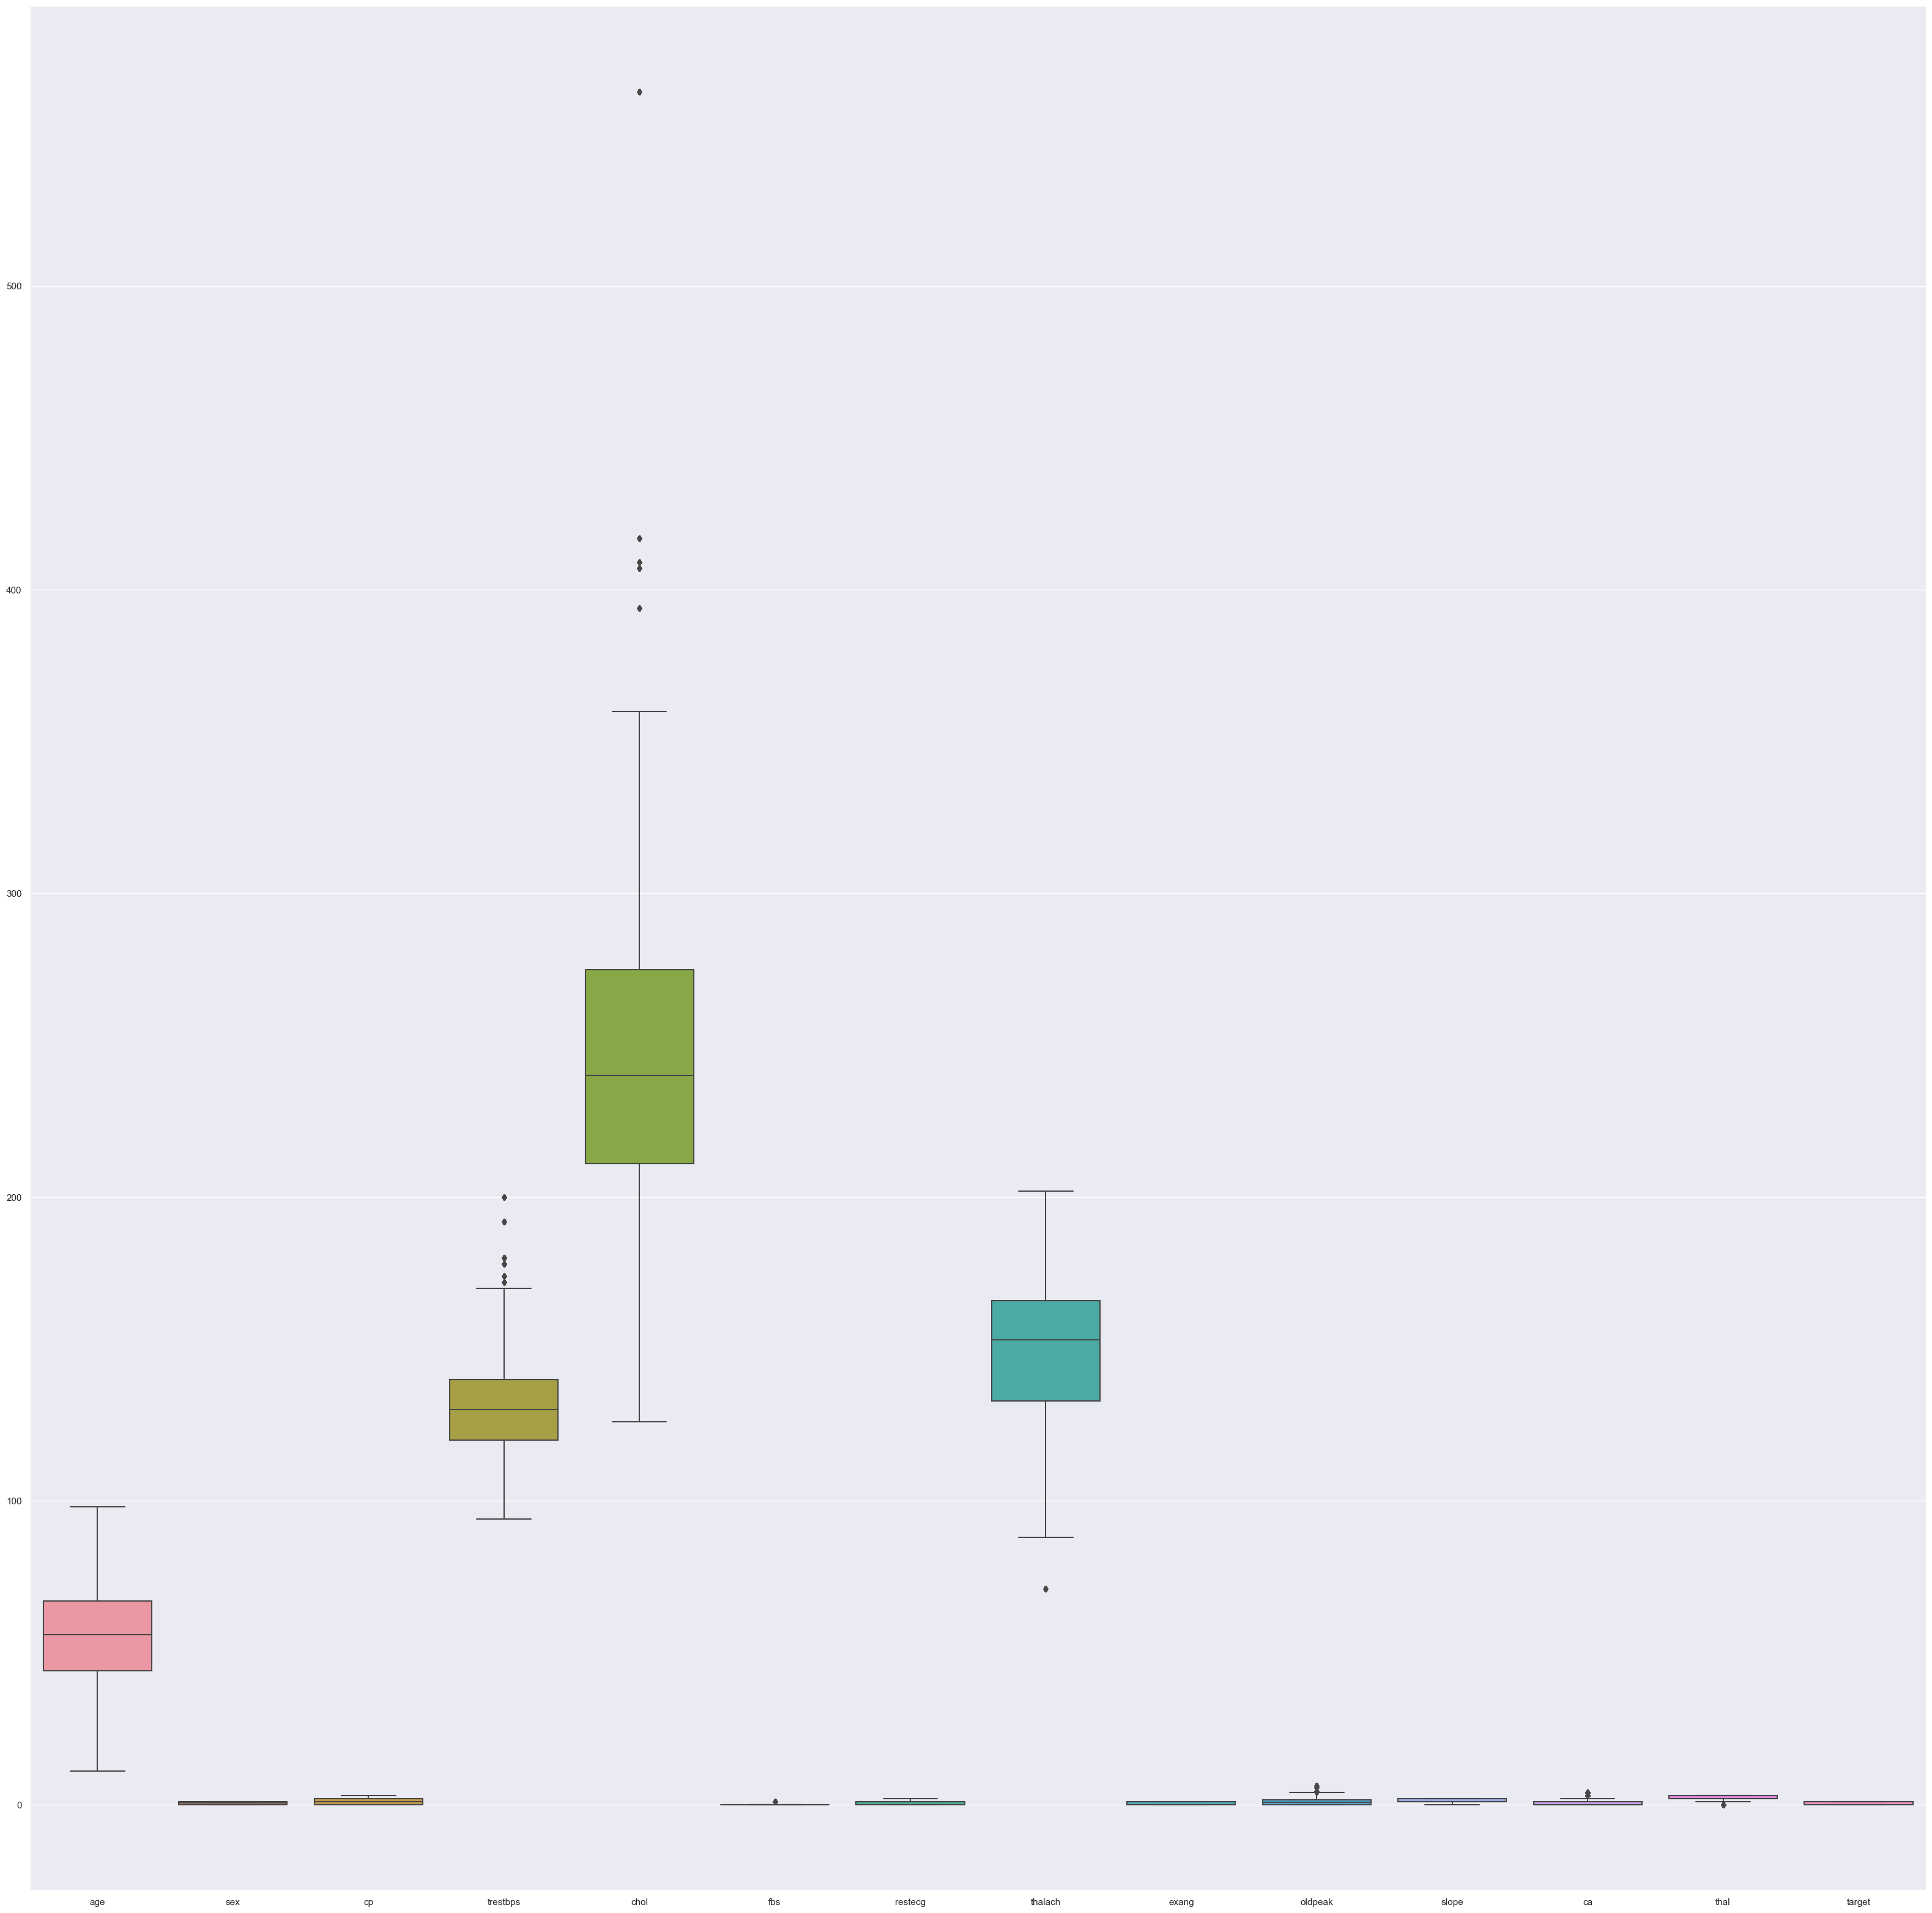

In [130]:
sns.set(rc={'figure.figsize':(40,40)})
sns.boxplot(df1)

chol trestbps thalac

In [131]:
for i in range(0,len(numerical)-1):
    IQR = df1['{}'.format(numerical[i])].quantile(0.75) - df1['{}'.format(numerical[i])].quantile(0.25)
    Lower = df1['{}'.format(numerical[i])].quantile(0.25) - (IQR * 3)
    Upper = df1['{}'.format(numerical[i])].quantile(0.75) + (IQR * 3)
    print('{name} outliers are values < {lowerboundary} or > {upperboundary}'.format(name=str(numerical[i]),lowerboundary=Lower, upperboundary=Upper))

age outliers are values < -25.0 or > 136.0
sex outliers are values < -3.0 or > 4.0
cp outliers are values < -6.0 or > 8.0
trestbps outliers are values < 60.0 or > 200.0
chol outliers are values < 19.0 or > 467.0
fbs outliers are values < 0.0 or > 0.0
restecg outliers are values < -3.0 or > 4.0
thalach outliers are values < 34.0 or > 265.0
exang outliers are values < -3.0 or > 4.0
oldpeak outliers are values < -4.800000000000001 or > 6.4
slope outliers are values < -2.0 or > 5.0
ca outliers are values < -3.0 or > 4.0
thal outliers are values < -1.0 or > 6.0


In [132]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26058.000000,26058.00000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000
mean,55.655730,0.50000,0.956635,131.590682,246.286591,0.149896,0.526057,149.643181,0.326886,1.039742,1.399724,0.720623,2.319057,0.547778
std,15.190407,0.50001,1.022467,17.597086,51.651701,0.356977,0.525688,22.865871,0.469084,1.165673,0.616529,1.011317,0.604868,0.497722
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [133]:
def max_value(i, variable, top):
    return np.where(i[variable]>top, top, i[variable])

for i in [df1]:
    i['chol'] = max_value(i, 'chol', 467.0)
    i['trestbps'] = max_value(i, 'trestbps', 200.0)
    i['thalach'] = max_value(i, 'thalach', 265)

In [134]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26058.000000,26058.00000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000
mean,55.655730,0.50000,0.956635,131.590682,245.988794,0.149896,0.526057,149.643181,0.326886,1.039742,1.399724,0.720623,2.319057,0.547778
std,15.190407,0.50001,1.022467,17.597086,50.074558,0.356977,0.525688,22.865871,0.469084,1.165673,0.616529,1.011317,0.604868,0.497722
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,467.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Train test split

In [135]:
X = df1.drop(['target'],axis=1)
y = df1.target
X.shape,y.shape

((26058, 13), (26058,))

In [152]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.5)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13029, 13), (13029, 13), (13029,), (13029,))

In [153]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_cnn = scaler.fit_transform(X_train)
X_test_cnn = scaler.transform(X_test)

X_train_cnn = pd.DataFrame(X_train_cnn,columns=cols)
X_test_cnn = pd.DataFrame(X_test_cnn,columns=cols)

In [154]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

In [155]:
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [156]:
h_model = Sequential()
h_model.add(Dense(60, input_shape = (13,), activation = "relu"))
h_model.add(Dense(120, activation = "relu"))
h_model.add(Dense(256, activation = "relu"))
h_model.add(Dropout(0.2))
h_model.add(Dense(1, activation = "sigmoid"))
h_model.compile(Adam(learning_rate = 0.01), "binary_crossentropy", metrics = ["accuracy"])
h_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 60)                840       
                                                                 
 dense_35 (Dense)            (None, 120)               7320      
                                                                 
 dense_36 (Dense)            (None, 256)               30976     
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 1)                 257       
                                                                 
Total params: 39,393
Trainable params: 39,393
Non-trainable params: 0
_________________________________________________________________


In [157]:
m_loss = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [158]:
%%time
hyper_history = h_model.fit(X_train_cnn,
                             y_train,
                             validation_split=0.2, callbacks=[m_loss], 
                             epochs=200)

Epoch 1/200


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


326/326 [==============================] - 2s 4ms/step - loss: 0.3198 - accuracy: 0.8692 - val_loss: 0.2120 - val_accuracy: 0.9171
Epoch 2/200
326/326 [==============================] - 1s 3ms/step - loss: 0.1881 - accuracy: 0.9277 - val_loss: 0.2239 - val_accuracy: 0.9305
Epoch 3/200
326/326 [==============================] - 1s 3ms/step - loss: 0.1369 - accuracy: 0.9470 - val_loss: 0.0962 - val_accuracy: 0.9589
Epoch 4/200
326/326 [==============================] - 1s 3ms/step - loss: 0.0854 - accuracy: 0.9662 - val_loss: 0.0508 - val_accuracy: 0.9785
Epoch 5/200
326/326 [==============================] - 1s 3ms/step - loss: 0.0765 - accuracy: 0.9693 - val_loss: 0.0787 - val_accuracy: 0.9720
Epoch 6/200
326/326 [==============================] - 1s 3ms/step - loss: 0.0528 - accuracy: 0.9790 - val_loss: 0.0807 - val_accuracy: 0.9559
Epoch 7/200
326/326 [==============================] - 1s 3ms/step - loss: 0.0472 - accuracy: 0.9808 - val_loss: 0.0281 - val_accuracy: 0.9885
Epoch 8/200

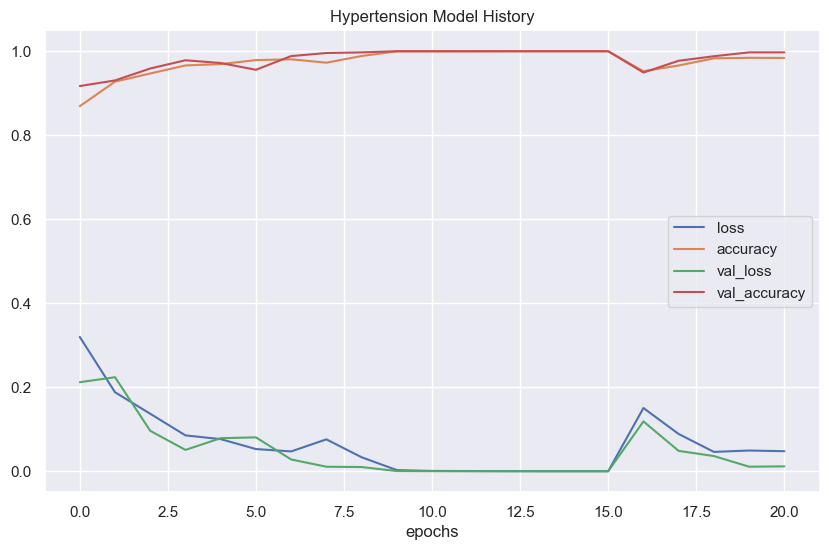

In [159]:
dfh = pd.DataFrame(hyper_history.history)
plt.figure(figsize=(10, 6))
plt.title('Hypertension Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [160]:
print("Evaluate h_model against trained data")
score = h_model.evaluate(X_train_cnn, y_train, verbose=0)
print("score %s: %.2f%%" % (h_model.metrics_names[1], score[1]*100))

print("Evaluate h_model against new data")
score = h_model.evaluate(X_test_cnn, y_test, verbose=0)
print("score %s: %.2f%%" % (h_model.metrics_names[1], score[1]*100))

Evaluate h_model against trained data
score accuracy: 100.00%
Evaluate h_model against new data
score accuracy: 100.00%


In [161]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Model prediction test")
# prediction return class type (1 or 0)
y_pred_class = h_model.predict(X_test)
# prediction return proability percentage
y_pred_prob = h_model.predict(X_test)

print ("#  original | predicted  | probability  ")
for idx, label in enumerate(y_test):
    print ("%s     | %s  | %s |   %.2f%%" % (str(idx), str(label), str(y_pred_class[idx]), float(y_pred_prob[idx])*100))

# manually calculate accuracy rate
print("")
count = len(["ok" for idx, label in enumerate(y_test) if label == y_pred_class[idx]])
print ("Manually calculated accuracy is: %.2f%%" % ((float(count) / len(y_test))*100))
# using accuracy_score()
print ("Keras accuracy_score() is: %.2f%%" %  (accuracy_score(y_test, y_pred_class)*100))
print("")
print ("Simple confusion matrix ")
cm = confusion_matrix(y_test,y_pred_class)
print (cm)

Model prediction test
408/408 [==============================] - 0s 850us/step
#  original | predicted  | probability  
0     | 1  | [0.] |   0.00%
1     | 1  | [0.] |   0.00%
2     | 1  | [0.] |   0.00%
3     | 1  | [0.] |   0.00%
4     | 1  | [0.] |   0.00%
5     | 0  | [0.] |   0.00%
6     | 0  | [0.] |   0.00%
7     | 0  | [0.] |   0.00%
8     | 1  | [0.] |   0.00%
9     | 1  | [0.] |   0.00%
10     | 1  | [0.] |   0.00%
11     | 1  | [0.] |   0.00%
12     | 1  | [0.] |   0.00%
13     | 1  | [0.] |   0.00%
14     | 0  | [0.] |   0.00%
15     | 0  | [0.] |   0.00%
16     | 1  | [0.] |   0.00%
17     | 0  | [0.] |   0.00%
18     | 1  | [0.] |   0.00%
19     | 1  | [0.] |   0.00%
20     | 1  | [0.] |   0.00%
21     | 1  | [0.] |   0.00%
22     | 1  | [0.] |   0.00%
23     | 0  | [0.] |   0.00%
24     | 0  | [0.] |   0.00%
25     | 0  | [0.] |   0.00%
26     | 1  | [0.] |   0.00%
27     | 1  | [0.] |   0.00%
28     | 1  | [0.] |   0.00%
29     | 0  | [0.] |   0.00%
30     | 1  | [0.] |

RF

In [146]:
X = df1.drop(['target'],axis=1)
y = df1.target

# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20846, 13), (5212, 13), (20846,), (5212,))

In [147]:
cols = X_train.columns
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_RF = scaler.fit_transform(X_train)

X_test_RF = scaler.transform(X_test)

In [148]:
X_train_RF = pd.DataFrame(X_train_RF, columns=[cols])
X_test_RF = pd.DataFrame(X_test_RF, columns=[cols])
X_train_RF.shape, X_test_RF.shape

((20846, 13), (5212, 13))

In [149]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 1.0000
